In [1]:
#import the libraries
import pandas as pd
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [5]:
#Read in the bitcoin price data
df=pd.read_csv('BTC-USD.csv')
#set index to be the date
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
#show the dataset
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813


In [6]:
#Create lists to store the daily simple returns(DSR) for each day
Mon=[]
Tues=[]
Wed=[]
Thurs=[]
Fri=[]
Sat=[]
Sun=[]

In [7]:
#Create a function that gets the daily simple return(DSR) for each day and append it to the corresponding days
def get_dsr(day,dsr):
    if day=='Monday':
        Mon.append(float(dsr))
    elif day=='Tuesday':
        Tues.append(float(dsr))
    elif day=='Wednesday':
        Wed.append(float(dsr))
    elif day=='Thursday':
        Thurs.append(float(dsr))
    elif day=='Friday':
        Fri.append(float(dsr))
    elif day=='Saturday':
        Sat.append(float(dsr))
    elif day=='Sunday':
        Sun.append(float(dsr))
    else:
      print('Something is wrong')


In [10]:
#Calculate and show the daily simple return
DSR=df['Close'].pct_change(1)
#Create a new column to hold the daily simple return
df['DSR'] = DSR
#Remove the first row of data from the dataset
df = df[1:]
#Show the data
df

,Open,High,Low,Close,Adj Close,Volume,DSR
Date,,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-0.071926
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-0.069843
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.035735
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-0.024659
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,0.008352
...,...,...,...,...,...,...,...
2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,0.046688
2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,-0.013760
2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813,-0.077882


In [14]:
# Loop to gather daily simple returns and the corresponding weekday
for i in range(len(df)):
    df_dsr = df['DSR'].iloc[i]  # Access 'DSR' column using .iloc for efficiency
    curr_date = df.index[i]  # Get the current date from the index
    df_day_name = calendar.day_name[curr_date.weekday()]  # Get the weekday name

    # Add the daily simple return to the corresponding list for that day
    get_dsr(df_day_name, df_dsr)  # Ensure get_dsr() is defined and handles storing appropriately

In [15]:
#Create a function to average the returns of each day
def AVG(day):
  if not day:
    return [0]
  else:
    return [sum(day)/len(day)]

In [20]:
#Create a new dataframe and set the index to be the days of the week
df_returns =  pd.DataFrame(index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#Get the average for each day and add the values under/to a newly created column called 'AVG'
df_returns['AVG'] = AVG(Mon)+AVG(Tues)+AVG(Wed)+AVG(Thurs)+AVG(Fri)+AVG(Sat)+AVG(Sun)

<Axes: >

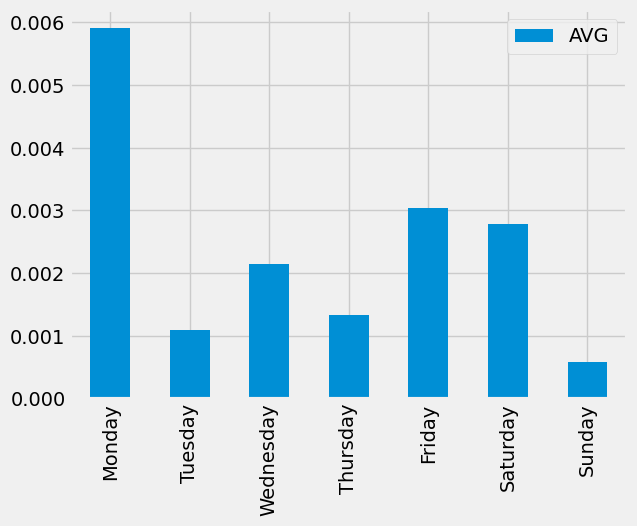

In [21]:
df_returns.plot.bar()

In [22]:
df_returns

,AVG
Monday,0.005907
Tuesday,0.001093
Wednesday,0.002145
Thursday,0.001325
Friday,0.003044
Saturday,0.002790
Sunday,0.000582
